In [2]:
import pandas as pd
import numpy as np
import math
from os.path import join
from collections import defaultdict
from collections import OrderedDict
from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib.ticker import MaxNLocator
%matplotlib inline
plt.rcParams['font.family'] = 'IPAPGothic'

In [3]:
import seaborn as sns
# sns.set_style(style="white")
sns.set(font='IPAPGothic', style="white")
def scatter_med(data, table, filename):
    label = []
    xtick = []
    value = []
    for k in data:
        for v in data[k]:
            value.append(v)
            label.append("{0}: {1}".format(table[k], k))
        xtick.append(table[k])
    df = pd.DataFrame({
        "category": label,
        "実行時間(sec)": value
    })
    median_width = 0.4
    meds = []
    for k in data:
        med = df.loc[df["category"] == "{0}: {1}".format(table[k], k)].median()['実行時間(sec)']
        meds.append(med)
    fig, ax = plt.subplots(dpi=900)
    sns.stripplot(x="category", y="実行時間(sec)", edgecolor="none", hue="category", palette="Set1", data=df, jitter=True)
    for tick, text in zip(ax.get_xticks(), ax.get_xticklabels()):
        sample_name = text.get_text()  # "X" or "Y"

        # calculate the median value for all replicates of either X or Y
        median_val = df[df['category']==sample_name]['実行時間(sec)'].median()

        # plot horizontal lines across the column, centered on the tick
        ax.plot([tick-median_width/2, tick+median_width/2], [median_val, median_val],
                lw=4, color='k')

    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.6, box.height])
    ax.set_xlabel('')
    ax.set_xticklabels(xtick)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
    fig.savefig(join("/Users/hashmup/Dropbox/研究室/卒業論文/thesis/images", filename))
    plt.show()

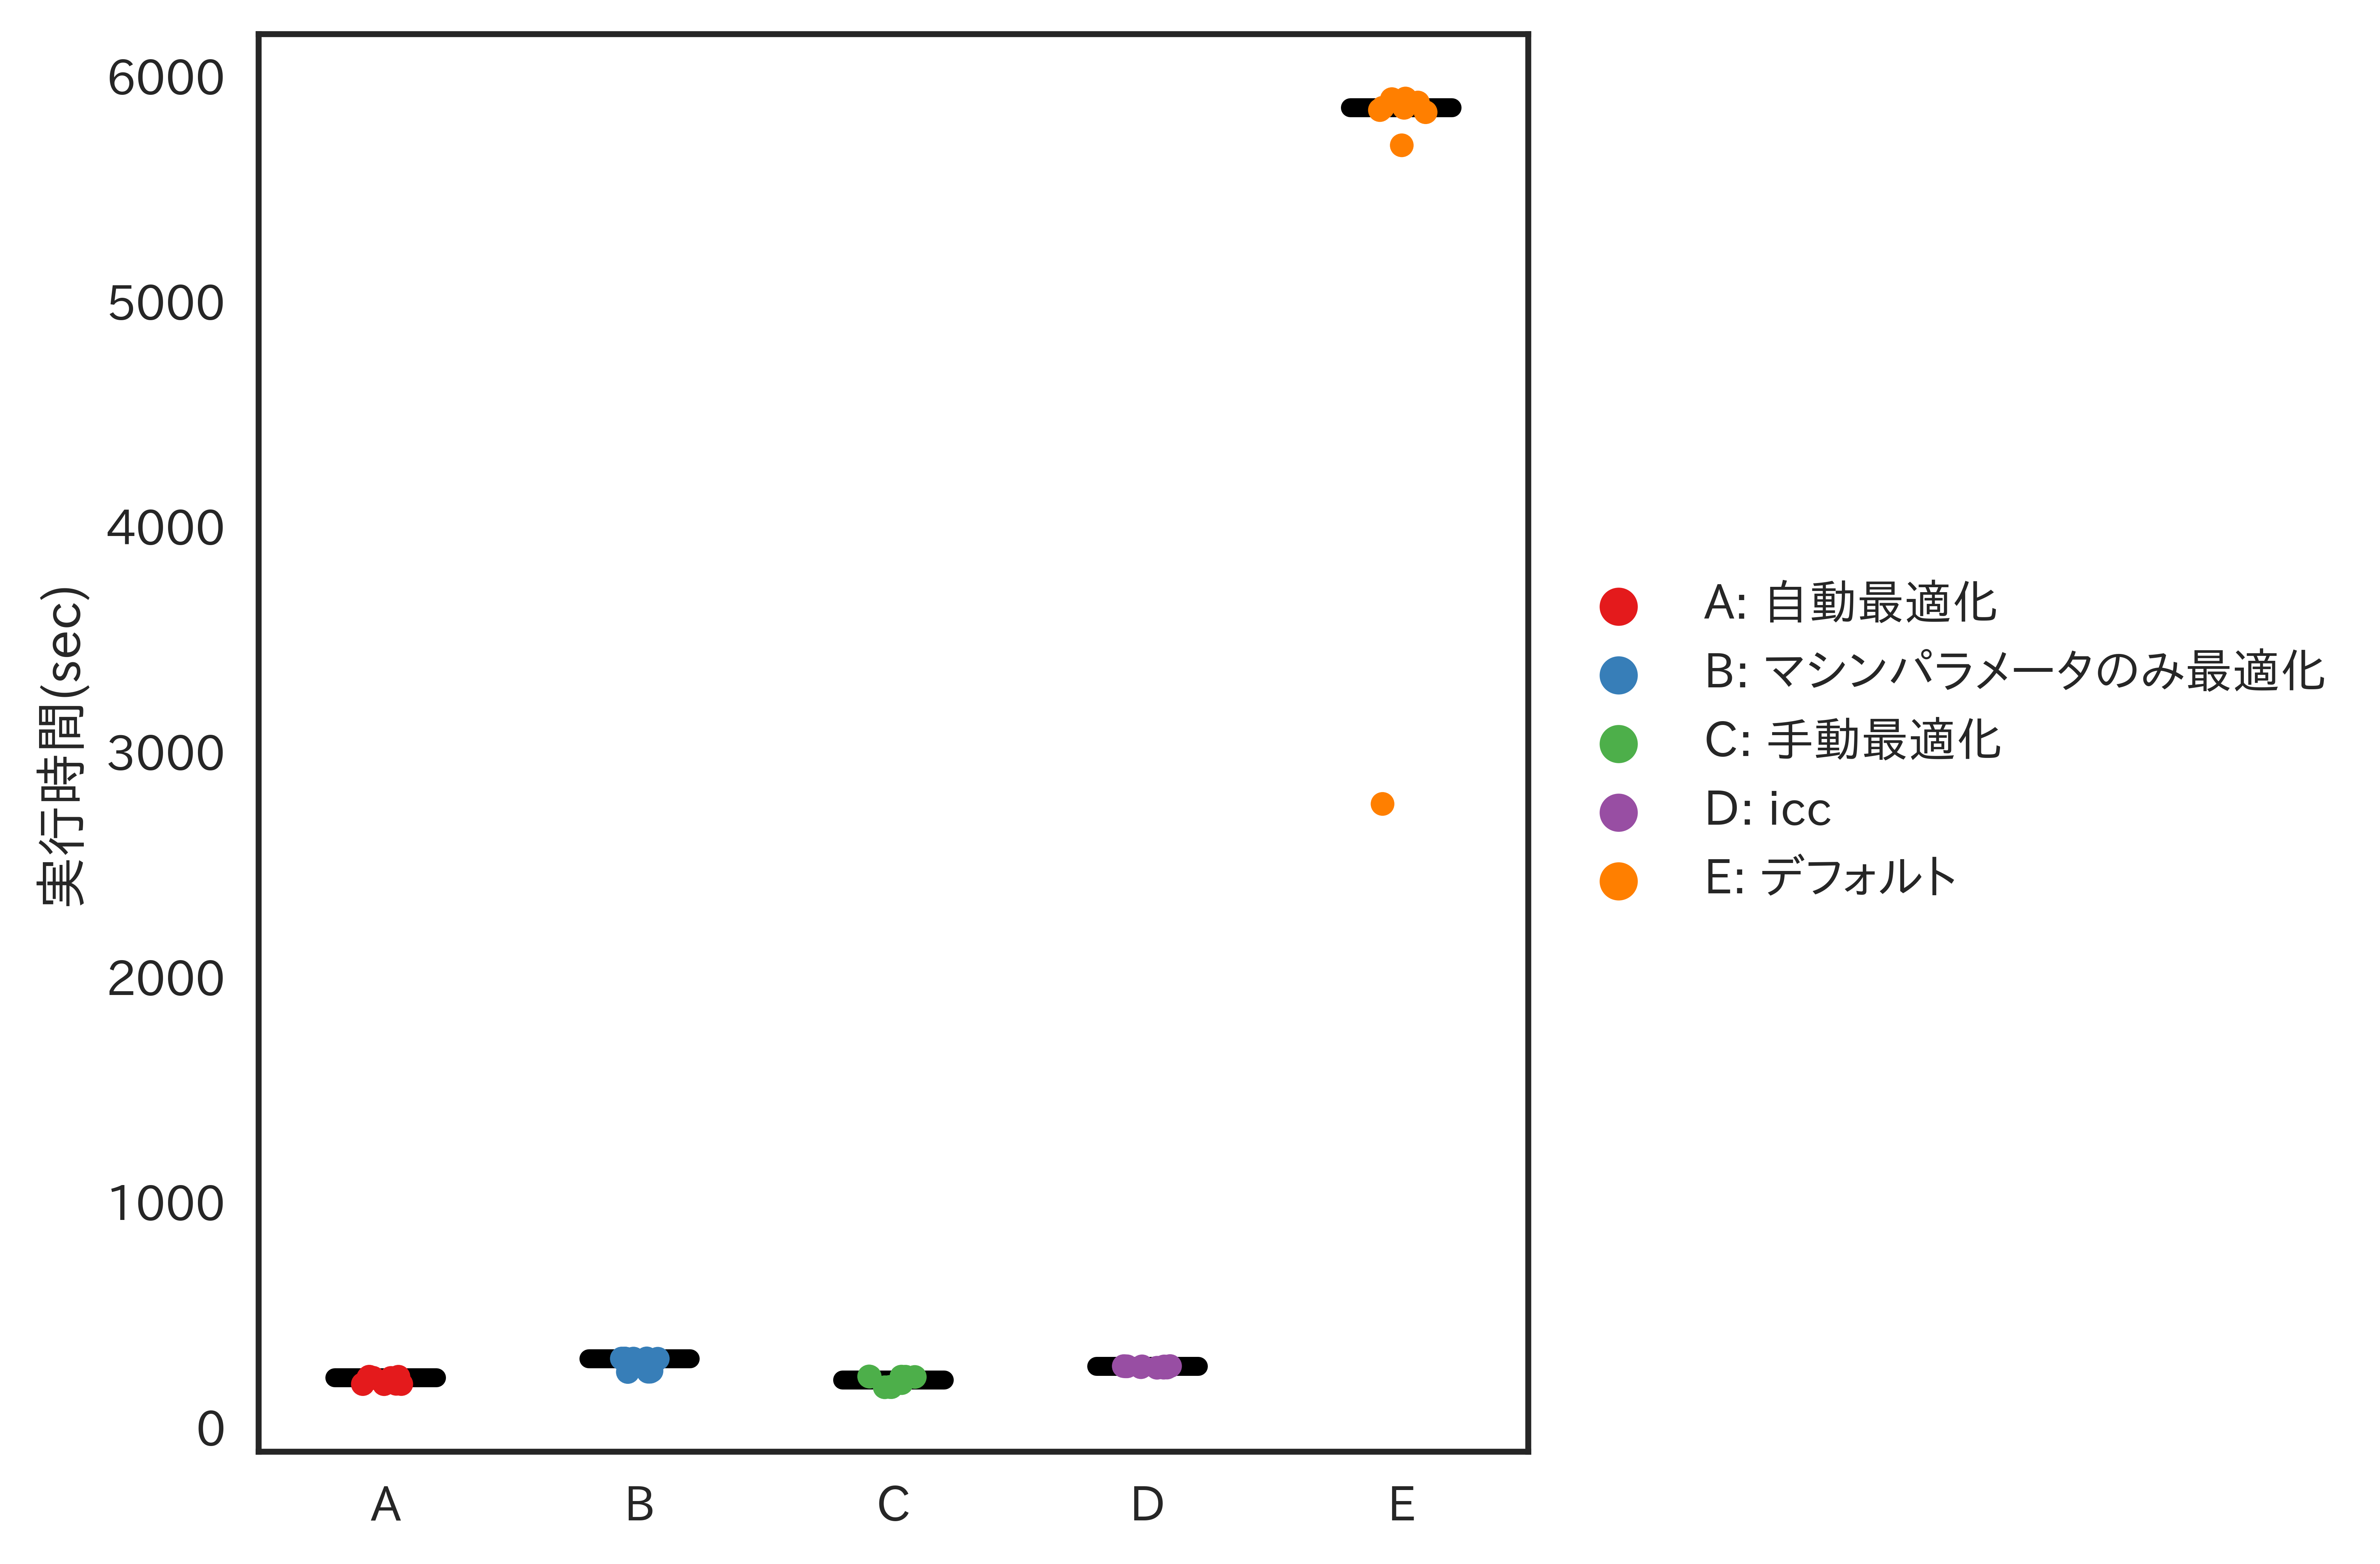

In [4]:
df_cluster = {
    "自動最適化": [220.992026, 192.518224, 194.101569, 220.950808, 220.335424, 225.530369, 192.859105, 225.757215, 220.190401, 193.026961],
    "マシンパラメータのみ最適化": [306.157610, 306.413272, 247.838257, 306.945893, 306.132023, 246.600985, 247.733106, 305.482598, 306.259903, 251.214914],
    "手動最適化": [226.011645, 226.855698, 178.792345, 179.301381, 225.616986, 225.840626, 197.147325, 180.120307, 224.526922, 196.936687],
    "icc": [266.276054, 267.938918, 265.444528, 265.809020, 271.246538, 271.793423, 271.584290, 272.576730, 271.736764, 272.912230],
    "デフォルト": [2769.389279, 5860.954495, 5841.403846, 5860.959548, 5850.891501, 5884.45570, 5882.077237, 5902.260200, 5899.499978, 5694.459678],
}
table = {
    "自動最適化": "A",
    "マシンパラメータのみ最適化": "B",
    "手動最適化": "C",
    "デフォルト": "E",
    "icc": "D"
}
d = scatter_med(df_cluster, table, "cluster-compare.pdf")
# boxplot(df_cluster, table, "cluster-compare.png", _range=5.0)

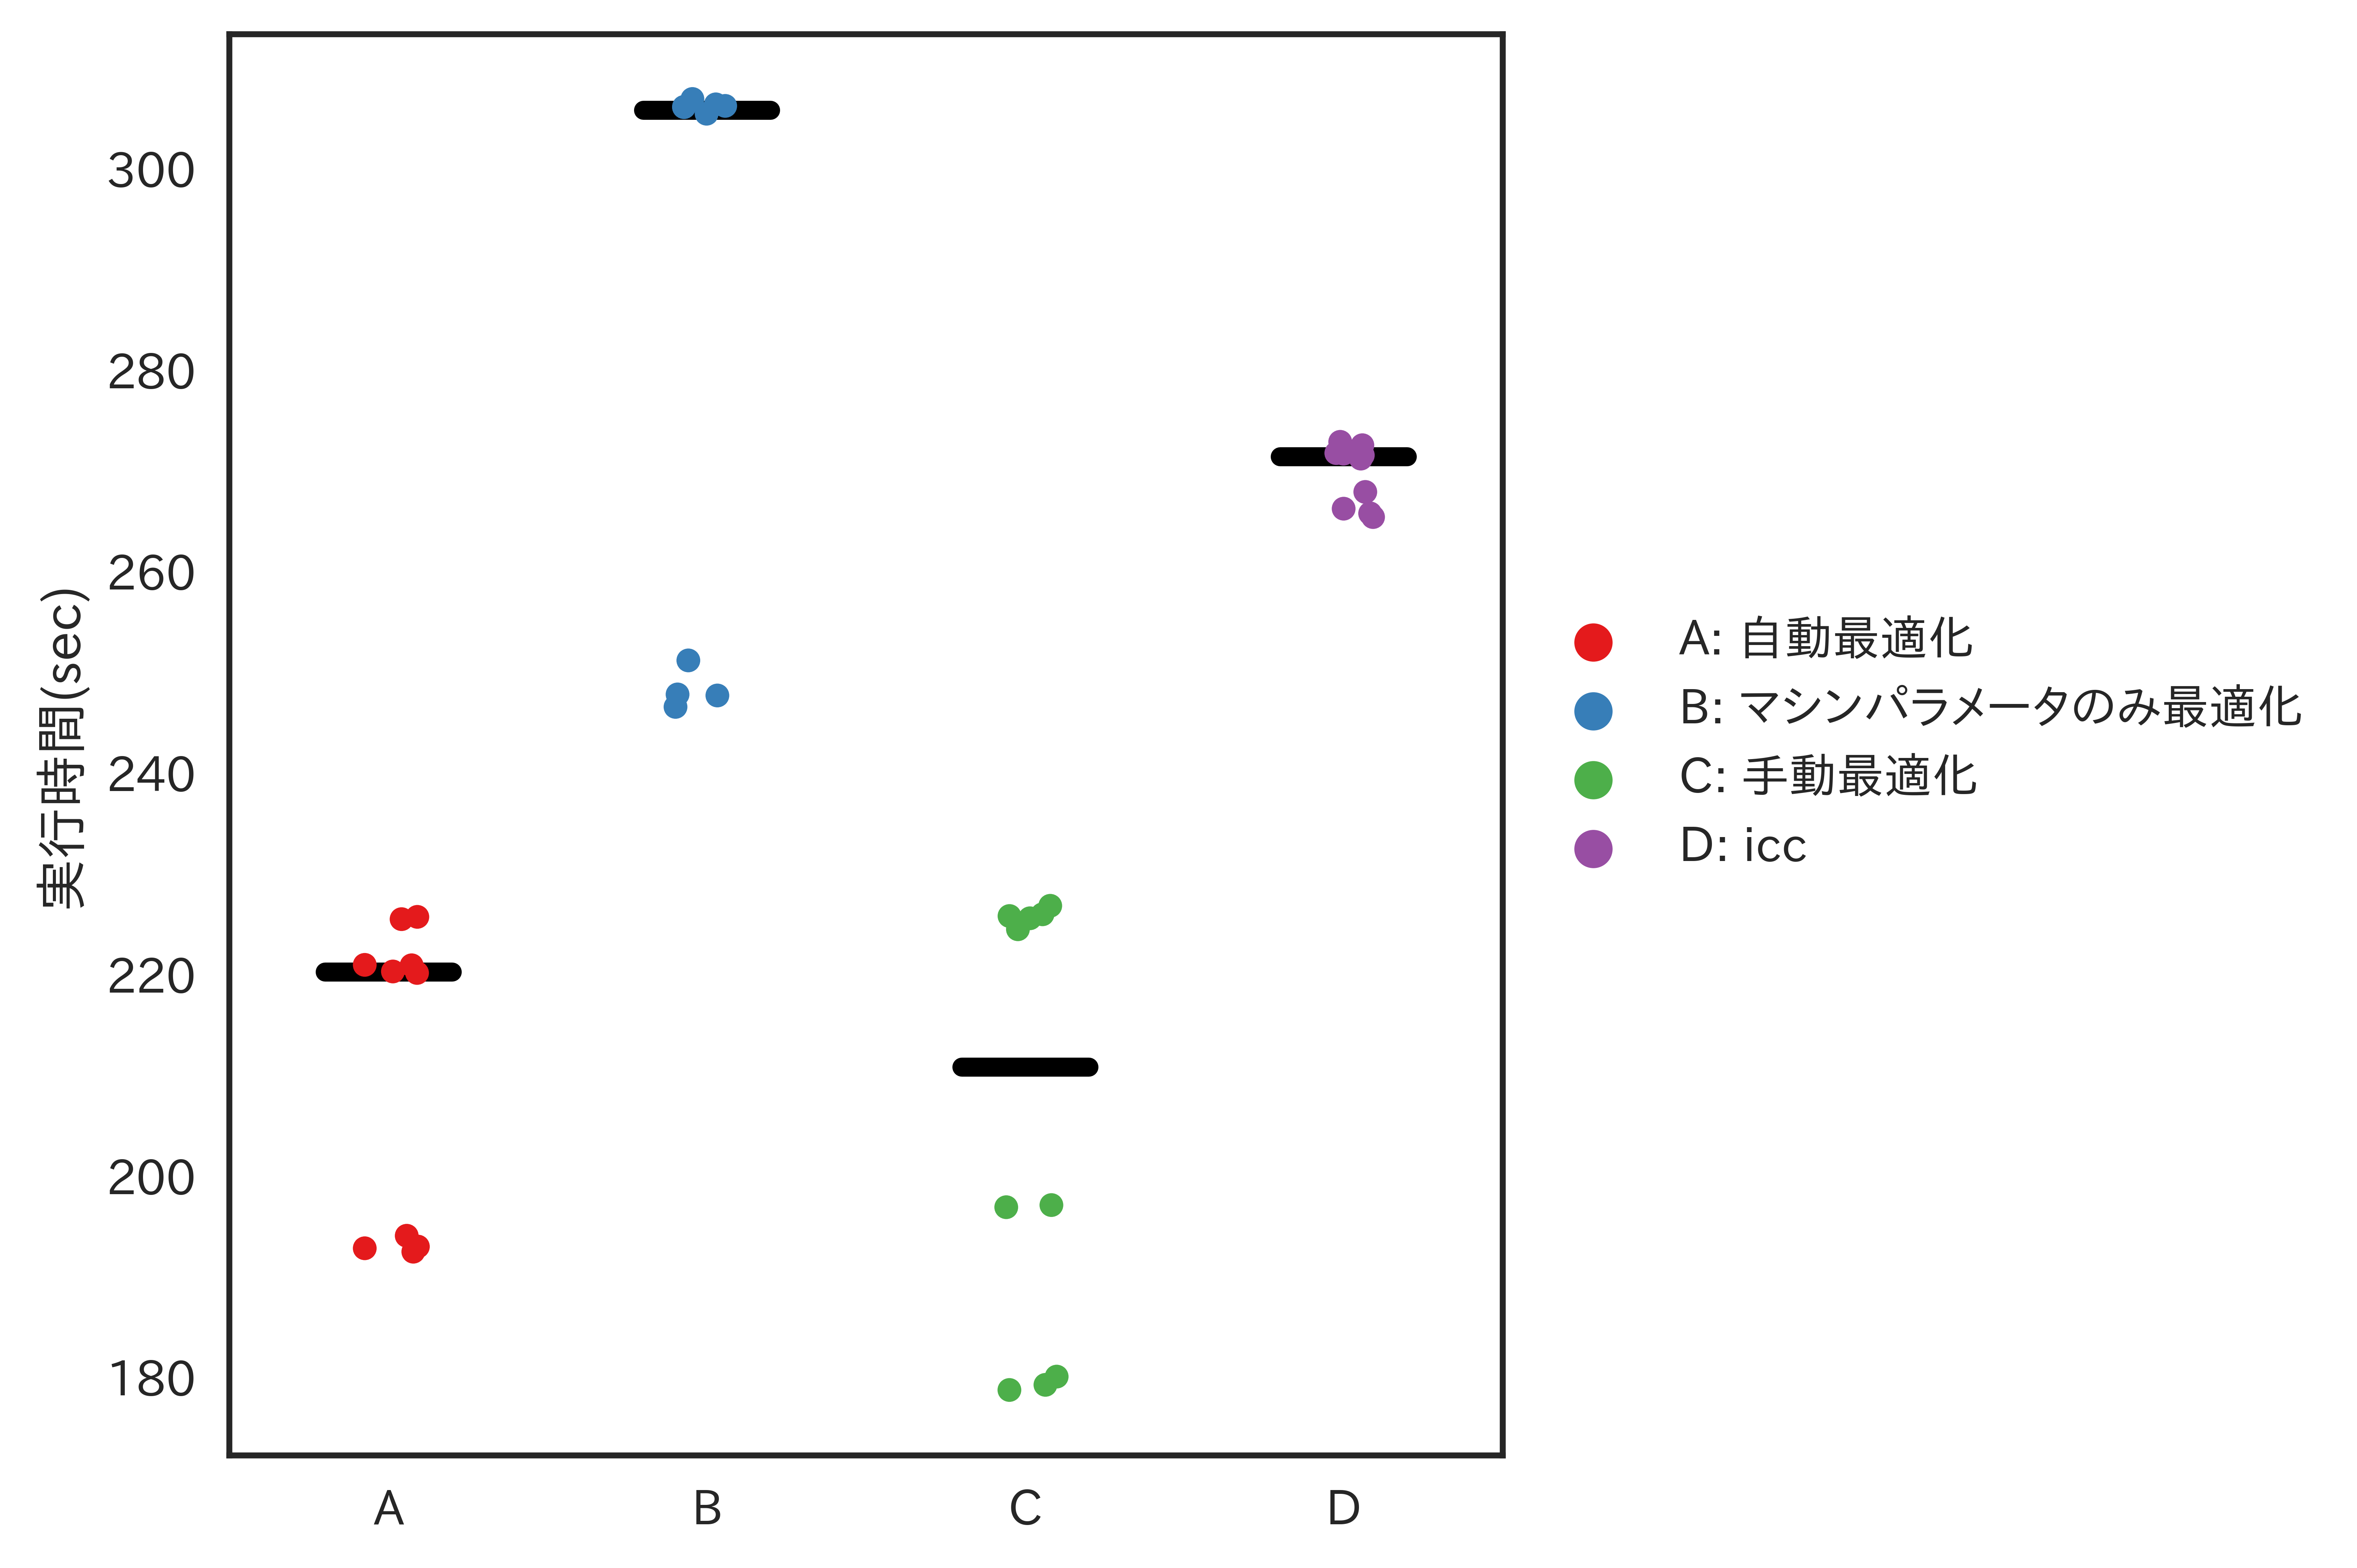

In [5]:
df_cluster2 = {
    "自動最適化": [220.992026, 192.518224, 194.101569, 220.950808, 220.335424, 225.530369, 192.859105, 225.757215, 220.190401, 193.026961],
    "マシンパラメータのみ最適化": [306.157610, 306.413272, 247.838257, 306.945893, 306.132023, 246.600985, 247.733106, 305.482598, 306.259903, 251.214914],
    "手動最適化": [226.011645, 226.855698, 178.792345, 179.301381, 225.616986, 225.840626, 197.147325, 180.120307, 224.526922, 196.936687],
    "icc": [266.276054, 267.938918, 265.444528, 265.809020, 271.246538, 271.793423, 271.584290, 272.576730, 271.736764, 272.912230],
}
table2 = {
    "自動最適化": "A",
    "マシンパラメータのみ最適化": "B",
    "手動最適化": "C",
    "icc": "D"
}
scatter_med(df_cluster2, table2, "cluster-compare-2.pdf")
# boxplot(df_cluster2, table2, "cluster-compare-2.png")

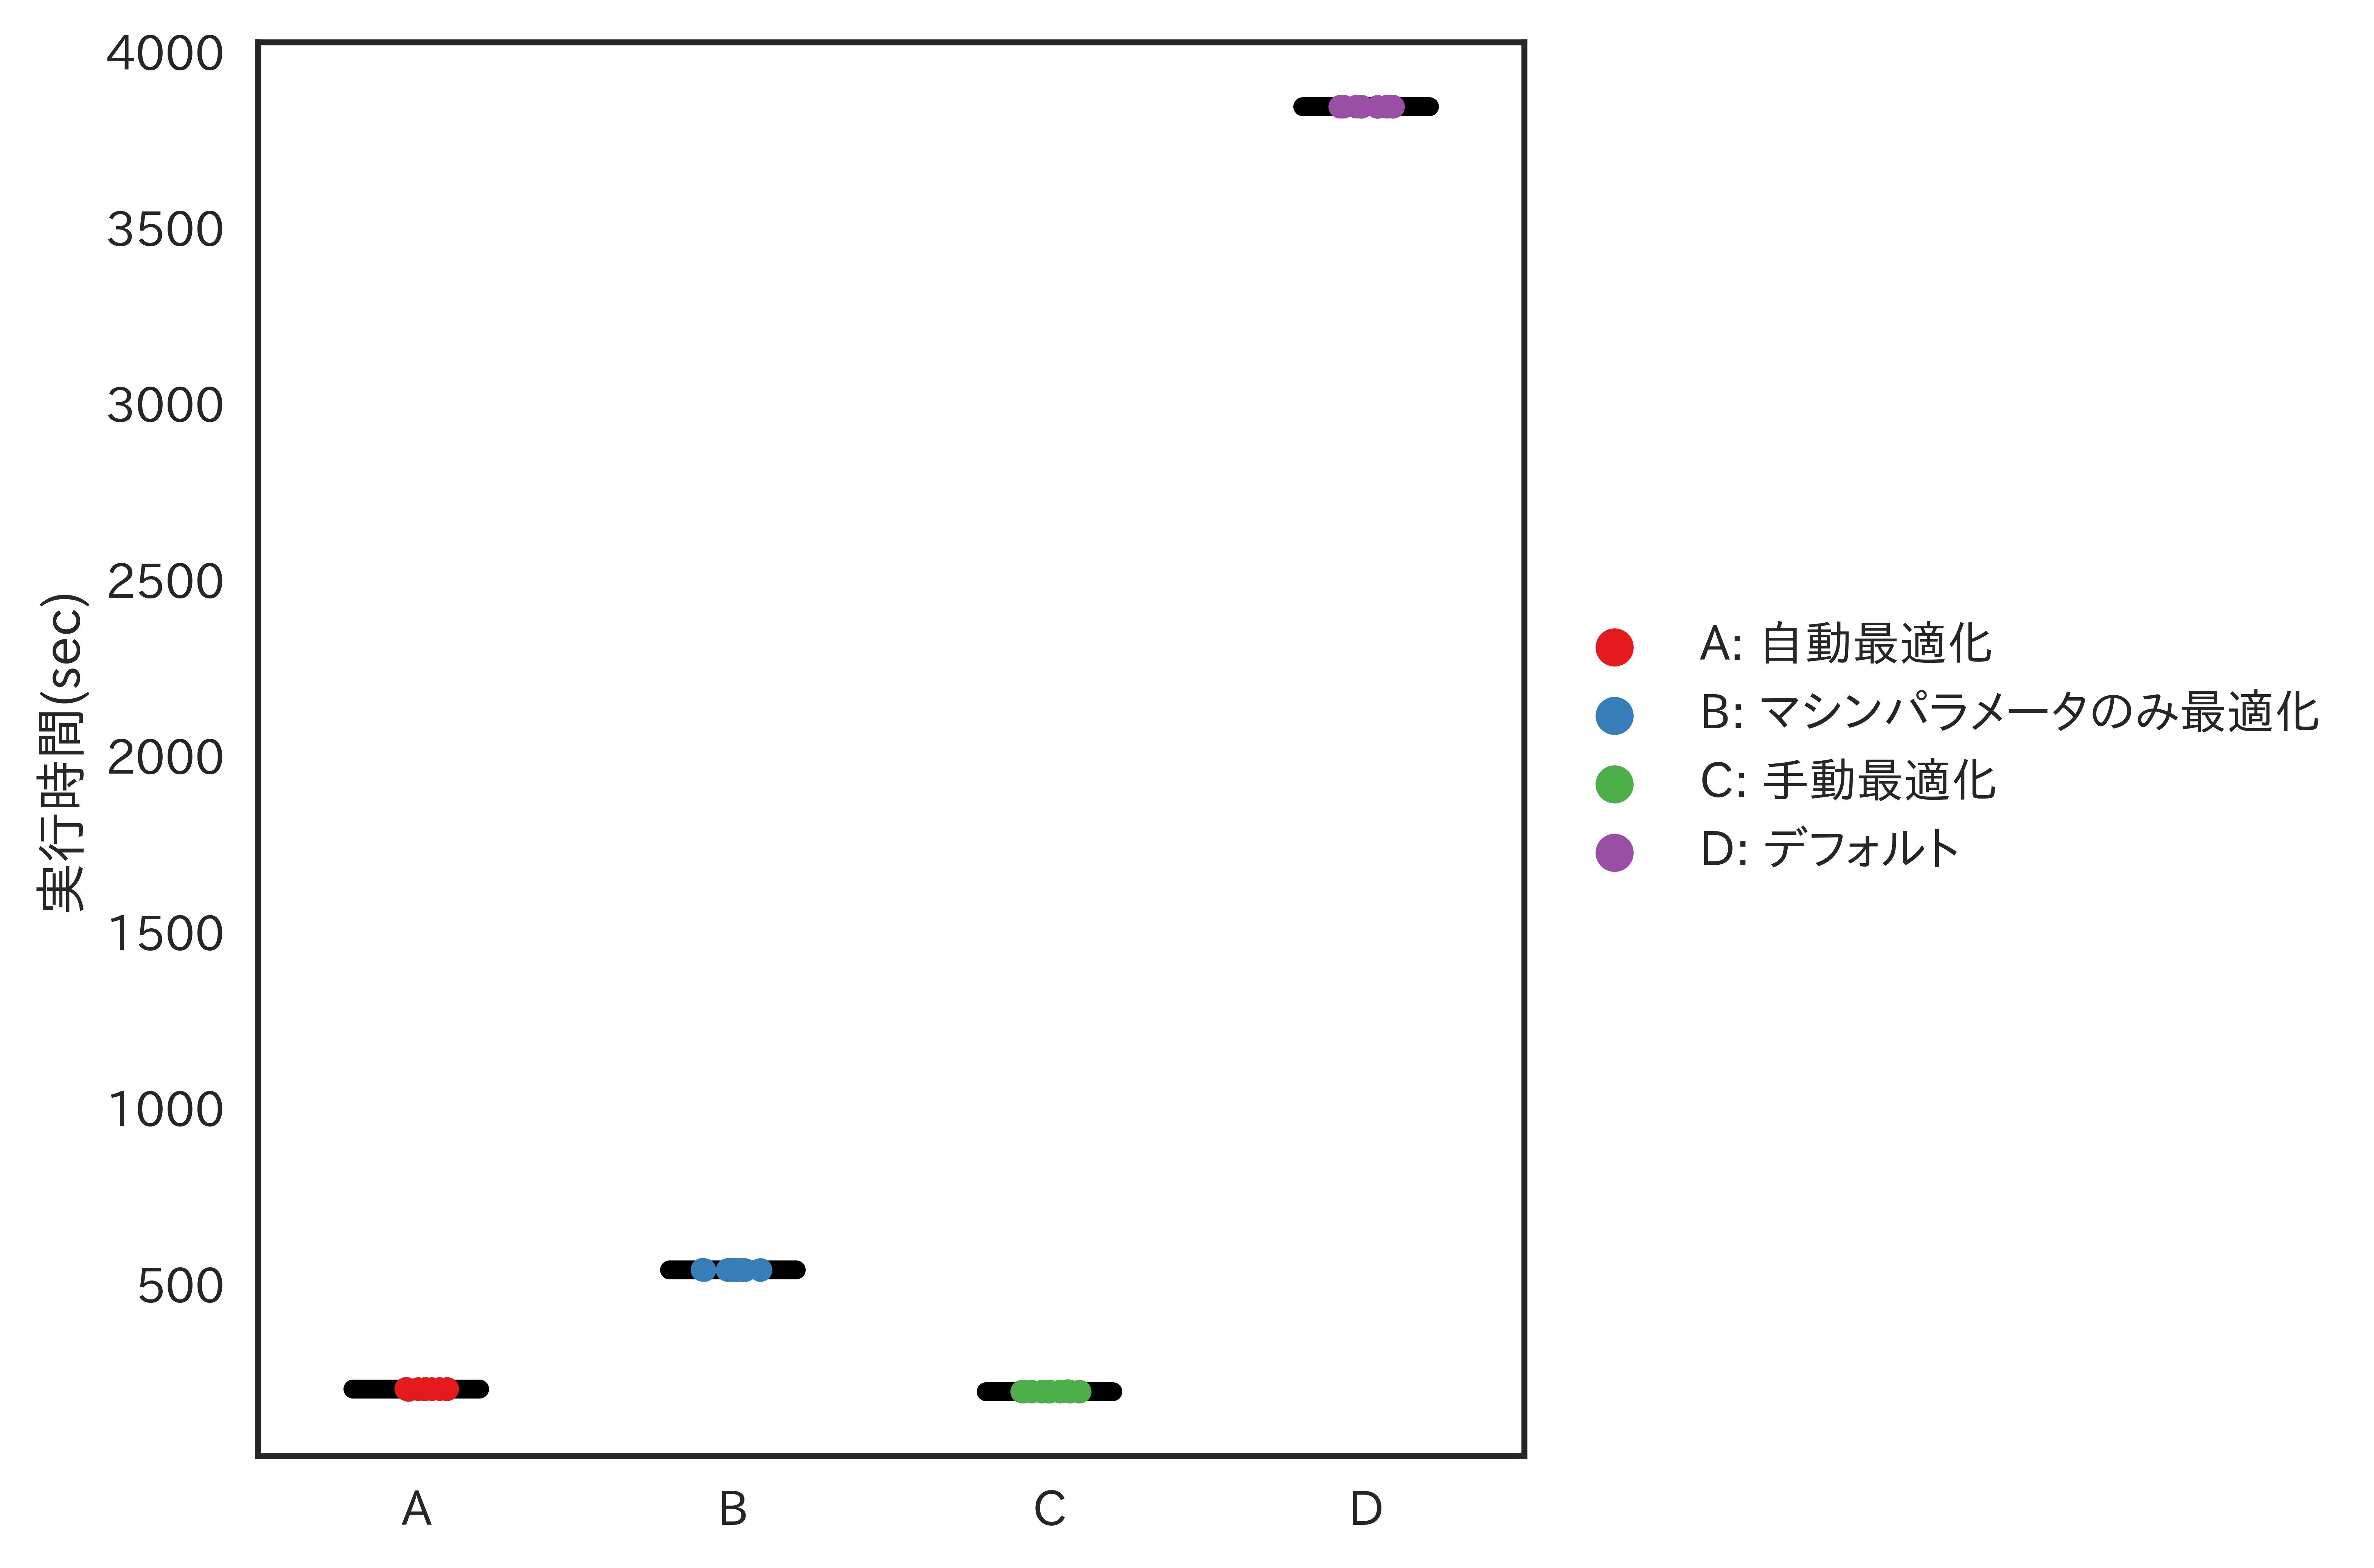

In [6]:
df_k = {
    "自動最適化": [202.158979 ,202.775673, 199.756990, 201.858775, 202.281723, 202.130959, 202.471293, 202.411957, 201.727052],
    "マシンパラメータのみ最適化": [540.314667, 540.195012, 540.236031, 540.566031, 540.155487, 540.235561, 539.998205, 540.286428, 540.843942, 540.834667],
    "手動最適化": [194.901470, 196.241227, 194.939445, 195.043659, 195.016793, 195.008183, 194.926891, 194.858799, 194.967911, 195.023119],
    "デフォルト": [3843.444054, 3843.728815, 3843.399342, 3843.391069, 3843.662798, 3843.337617, 3843.606756, 3843.164386, 3842.924506],
}
table3 = {
    "自動最適化": "A",
    "マシンパラメータのみ最適化": "B",
    "手動最適化": "C",
    "デフォルト": "D",
}
# boxplot(df_k, table3, "k-compare.png")
scatter_med(df_k, table3, "k-compare.pdf")

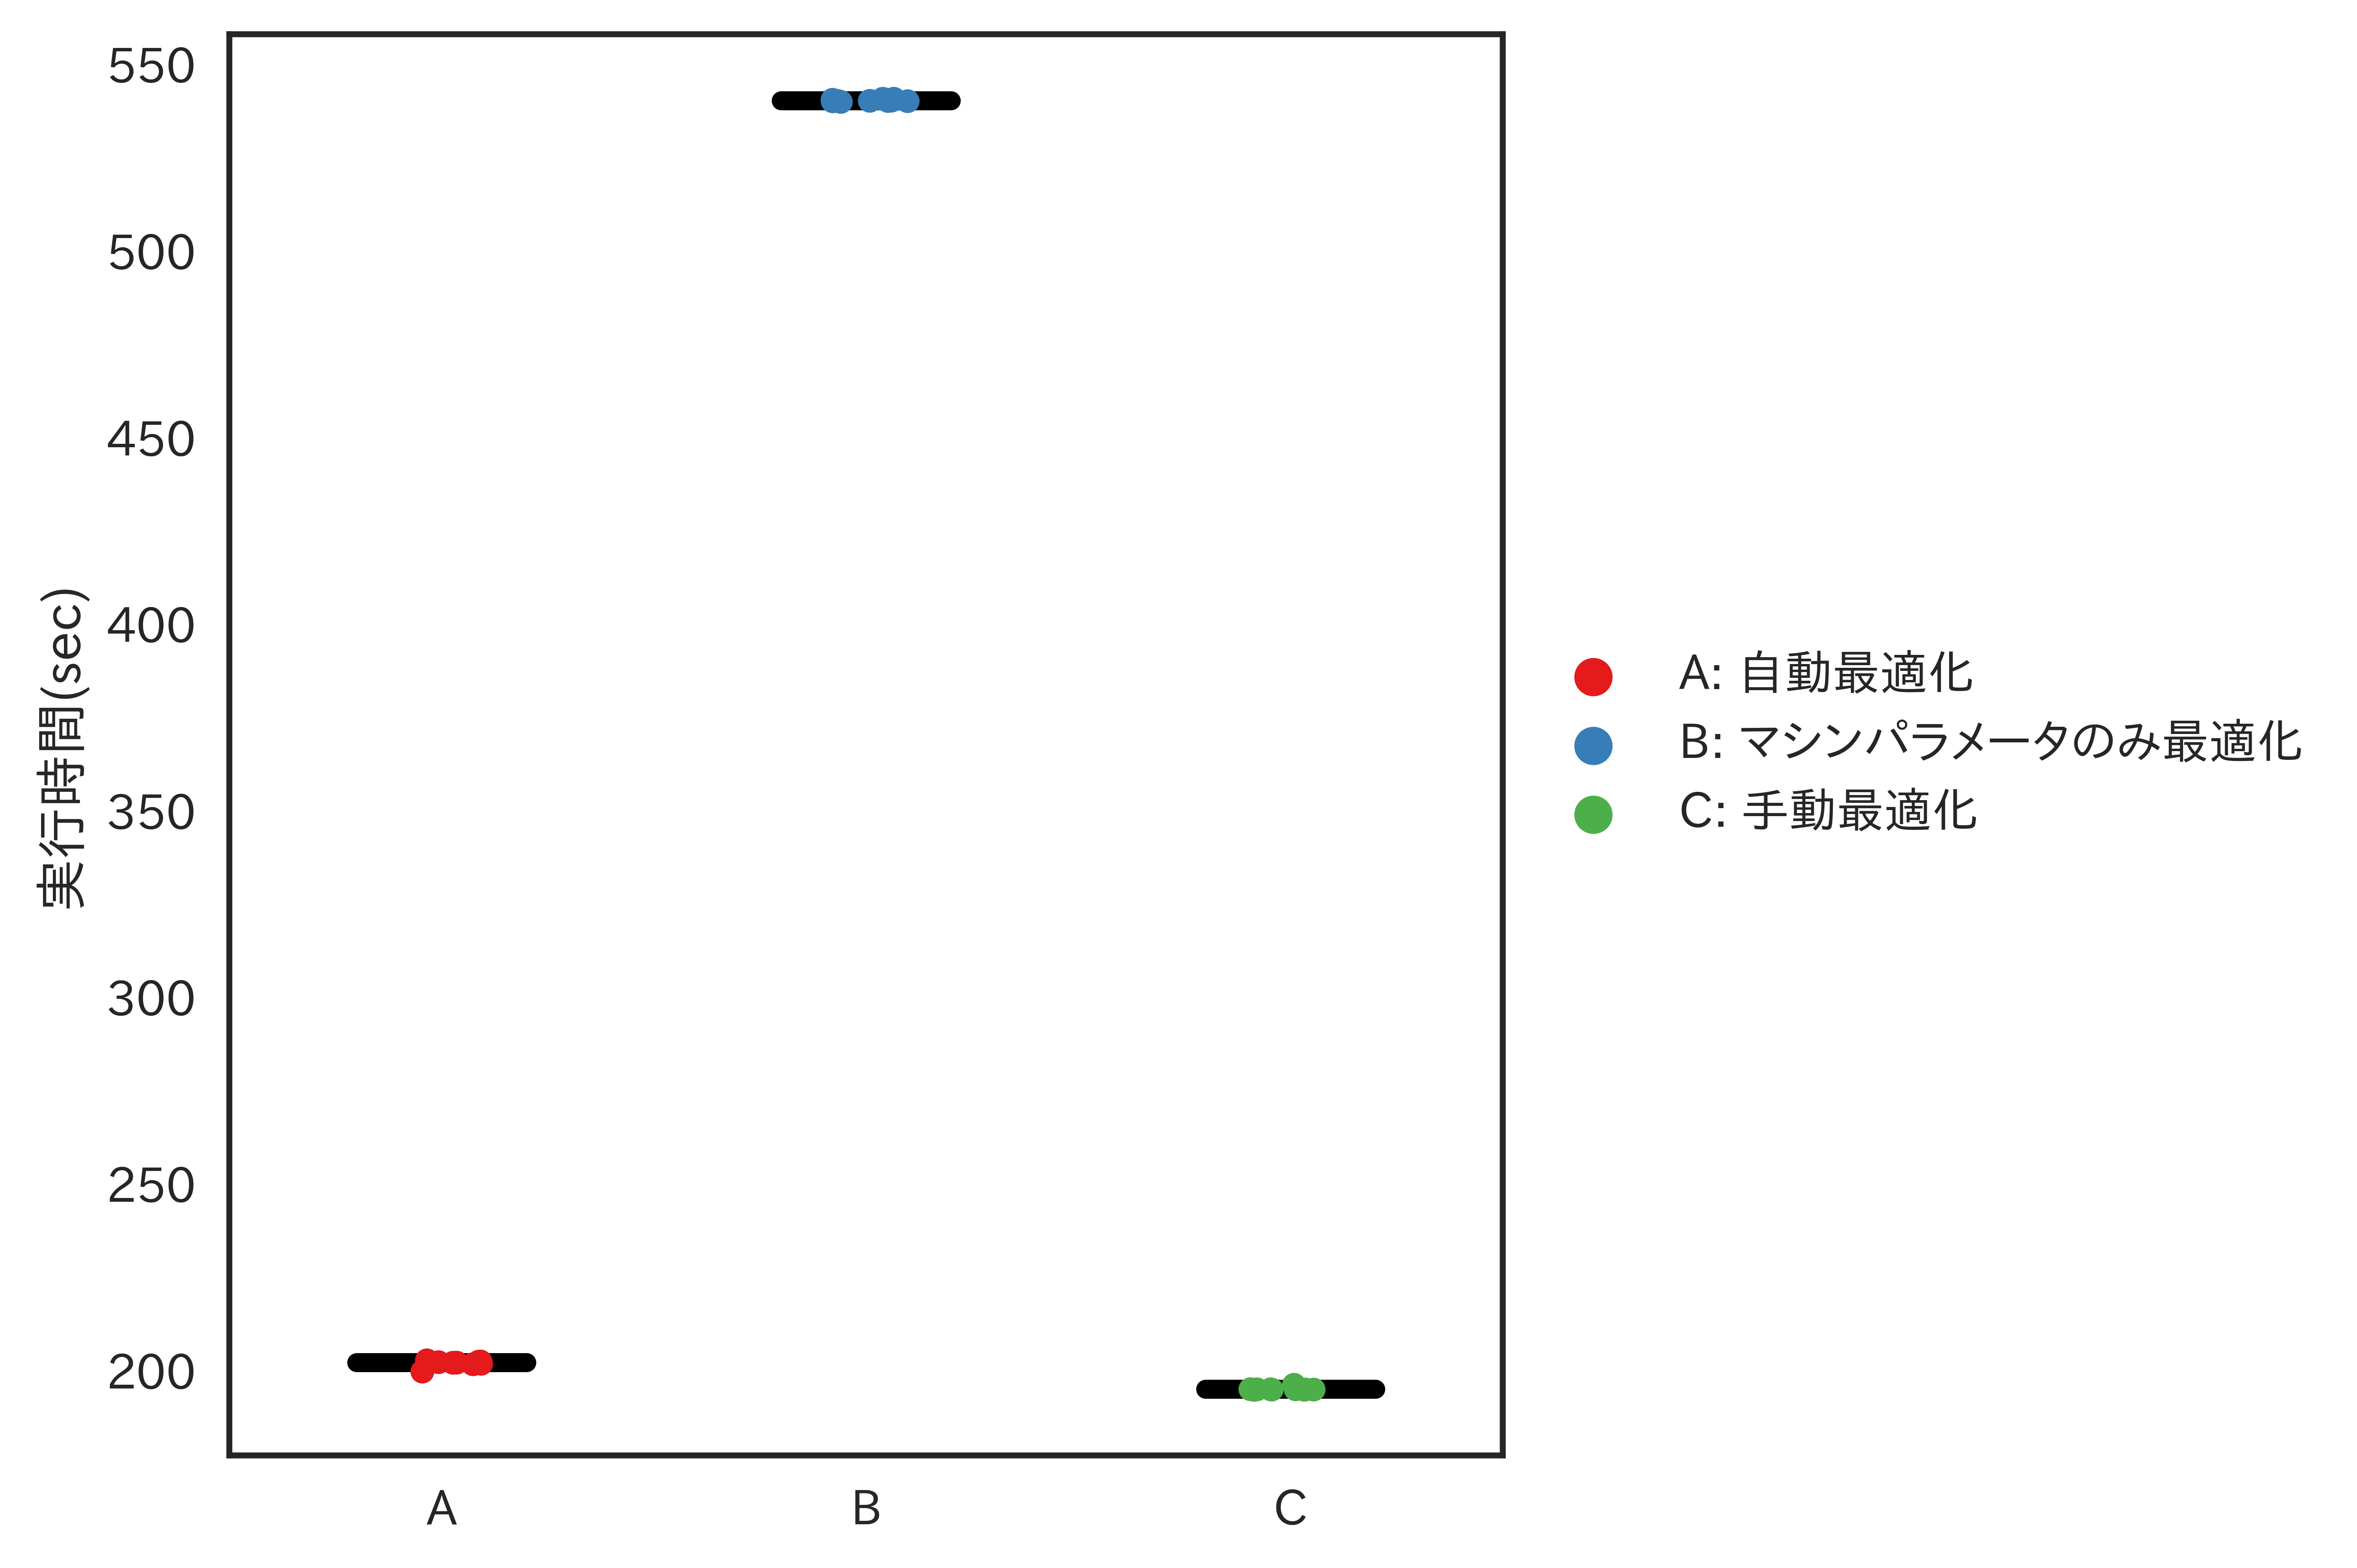

In [7]:
table4 = {
    "自動最適化": "A",
    "マシンパラメータのみ最適化": "B",
    "手動最適化": "C",
}
df_k = {
    "自動最適化": [202.158979 ,202.775673, 199.756990, 201.858775, 202.281723, 202.130959, 202.471293, 202.411957, 201.727052],
    "マシンパラメータのみ最適化": [540.314667, 540.195012, 540.236031, 540.566031, 540.155487, 540.235561, 539.998205, 540.286428, 540.843942, 540.834667],
    "手動最適化": [194.901470, 196.241227, 194.939445, 195.043659, 195.016793, 195.008183, 194.926891, 194.858799, 194.967911, 195.023119],
}
scatter_med(df_k, table4, "k-compare-2.pdf")

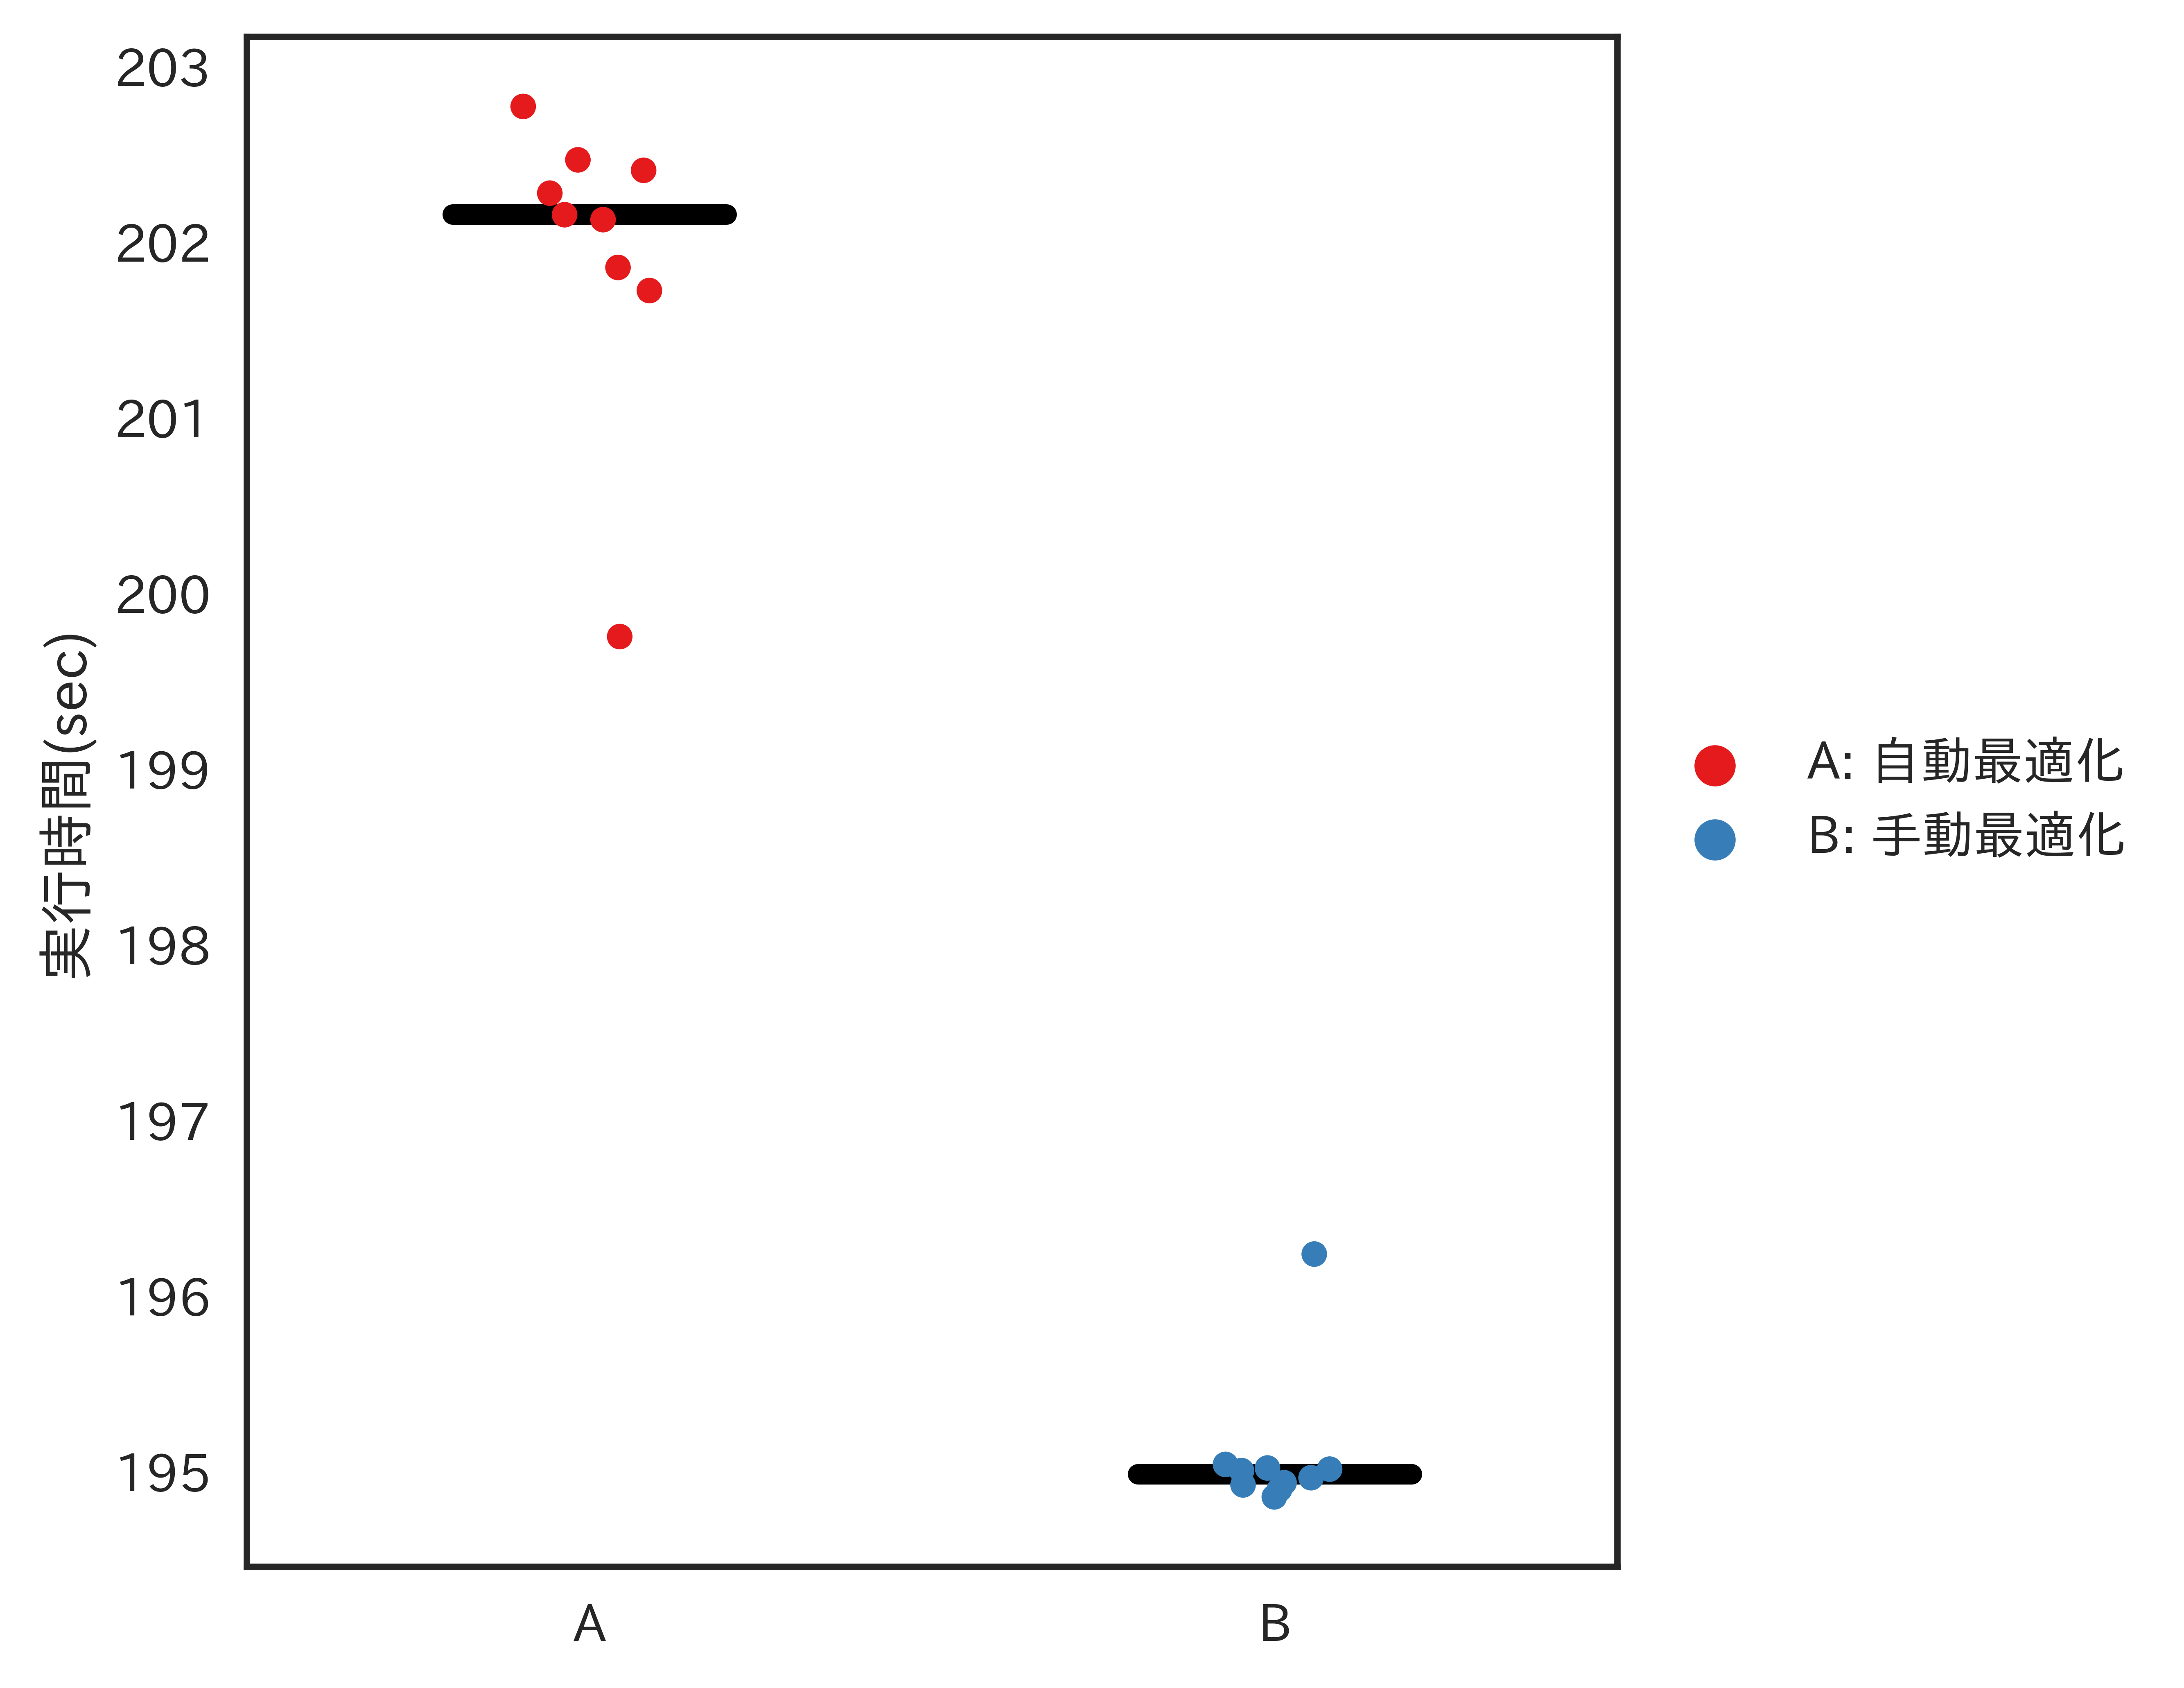

In [8]:
table5 = {
    "自動最適化": "A",
    "手動最適化": "B",
    "配列くくり出ししない": "C"
}
df_k = {
    "自動最適化": [202.158979 ,202.775673, 199.756990, 201.858775, 202.281723, 202.130959, 202.471293, 202.411957, 201.727052],
    "手動最適化": [194.901470, 196.241227, 194.939445, 195.043659, 195.016793, 195.008183, 194.926891, 194.858799, 194.967911, 195.023119],
    "配列くくり出ししない": [202.158979 ,202.775673, 199.756990, 201.858775, 202.281723, 202.130959, 202.471293, 202.411957, 201.727052]
}
scatter_med(df_k, table5, "k-compare-3.pdf")

In [72]:
import seaborn as sns
# sns.set_style(style="white")
sns.set(font='IPAPGothic', style="white")
def scatter_med2(data1, data2, table1, table2, filename):
    label1 = []
    label2 = []
    xtick1 = []
    xtick2 = []
    value1 = []
    value2 = []
    for k in data1:
        for v in data1[k]:
            value1.append(v)
            label1.append("{0}: {1}".format(table1[k], k))
        xtick1.append(table1[k])
    for k in data2:
        for v in data2[k]:
            value2.append(v)
            label2.append("{0}: {1}".format(table2[k], k))
        xtick2.append(table2[k])
    df1 = pd.DataFrame({
        "category": label1,
        "実行時間(sec)": value1
    })
    df2 = pd.DataFrame({
        "category": label2,
        "実行時間(sec)": value2
    })
    print(df1)
    print(df2)
    meds1 = []
    meds2 = []
    for k in data1:
        med = df1.loc[df1["category"] == "{0}: {1}".format(table1[k], k)].median()['実行時間(sec)']
        meds1.append(med)
    for k in data2:
        med = df2.loc[df2["category"] == "{0}: {1}".format(table2[k], k)].median()['実行時間(sec)']
        meds2.append(med)
    median_width = 0.4

    fig, axes = plt.subplots(nrows=1, ncols=2, dpi=900)
    sns.stripplot(x="category", y="実行時間(sec)", edgecolor="none", hue="category", palette="Set1", data=df1, jitter=True, ax=axes[0])
    sns.stripplot(x="category", y="実行時間(sec)", edgecolor="none", hue="category", palette="Set1", data=df2, jitter=True, ax=axes[1])
    for tick, text in zip(axes[0].get_xticks(), axes[0].get_xticklabels()):
        sample_name = text.get_text()  # "X" or "Y"

        # calculate the median value for all replicates of either X or Y
        median_val = df1[df1['category']==sample_name]['実行時間(sec)'].median()

        # plot horizontal lines across the column, centered on the tick
        axes[0].plot([tick-median_width/2, tick+median_width/2], [median_val, median_val],
                lw=4, color='k')
    for tick, text in zip(axes[1].get_xticks(), axes[1].get_xticklabels()):
        sample_name = text.get_text()  # "X" or "Y"

        # calculate the median value for all replicates of either X or Y
        median_val = df2[df2['category']==sample_name]['実行時間(sec)'].median()

        # plot horizontal lines across the column, centered on the tick
        axes[1].plot([tick-median_width/2, tick+median_width/2], [median_val, median_val],
                lw=4, color='k')
    axes[0].set_xlabel('')
    axes[1].set_xlabel('')
    axes[1].set_ylabel('')
#     axes[0].set_title('クラスタ')
#     axes[1].set_title('京')
    axes[0].set_xticklabels(xtick1, fontsize=20)
    axes[1].set_xticklabels(xtick2, fontsize=20)
    h1, l1 = axes[0].get_legend_handles_labels()
    h2, l2 = axes[1].get_legend_handles_labels()
    axes[0].legend_.remove()
    axes[1].legend_.remove()
#     fig.legend(h1+h2, l1, loc="center right", bbox_to_anchor=(1, 0.5), fontsize=10, frameon=True)
#     fig.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
#     fig.subplots_adjust(right=0.85)
    fig.savefig(join("/Users/hashmup/Dropbox/研究室/卒業論文/thesis/images", filename))
    plt.show()

       category   実行時間(sec)
0   A: ハイブリッド並列  306.157610
1   A: ハイブリッド並列  306.413272
2   A: ハイブリッド並列  247.838257
3   A: ハイブリッド並列  306.945893
4   A: ハイブリッド並列  306.132023
5   A: ハイブリッド並列  246.600985
6   A: ハイブリッド並列  247.733106
7   A: ハイブリッド並列  305.482598
8   A: ハイブリッド並列  306.259903
9   A: ハイブリッド並列  251.214914
10     B: 手動最適化  226.011645
11     B: 手動最適化  226.855698
12     B: 手動最適化  178.792345
13     B: 手動最適化  179.301381
14     B: 手動最適化  225.616986
15     B: 手動最適化  225.840626
16     B: 手動最適化  197.147325
17     B: 手動最適化  180.120307
18     B: 手動最適化  224.526922
19     B: 手動最適化  196.936687
20     C: SIMD化  202.158979
21     C: SIMD化  202.775673
22     C: SIMD化  199.756990
23     C: SIMD化  201.858775
24     C: SIMD化  202.281723
25     C: SIMD化  202.130959
26     C: SIMD化  202.471293
27     C: SIMD化  202.411957
28     C: SIMD化  201.727052
29  D: 変数配置の最適化  218.333398
30  D: 変数配置の最適化  194.375279
31  D: 変数配置の最適化  193.066097
32  D: 変数配置の最適化  193.743339
33  D: 変数配置の最適化  192.785934
34  D: 変数配置の最適化  192

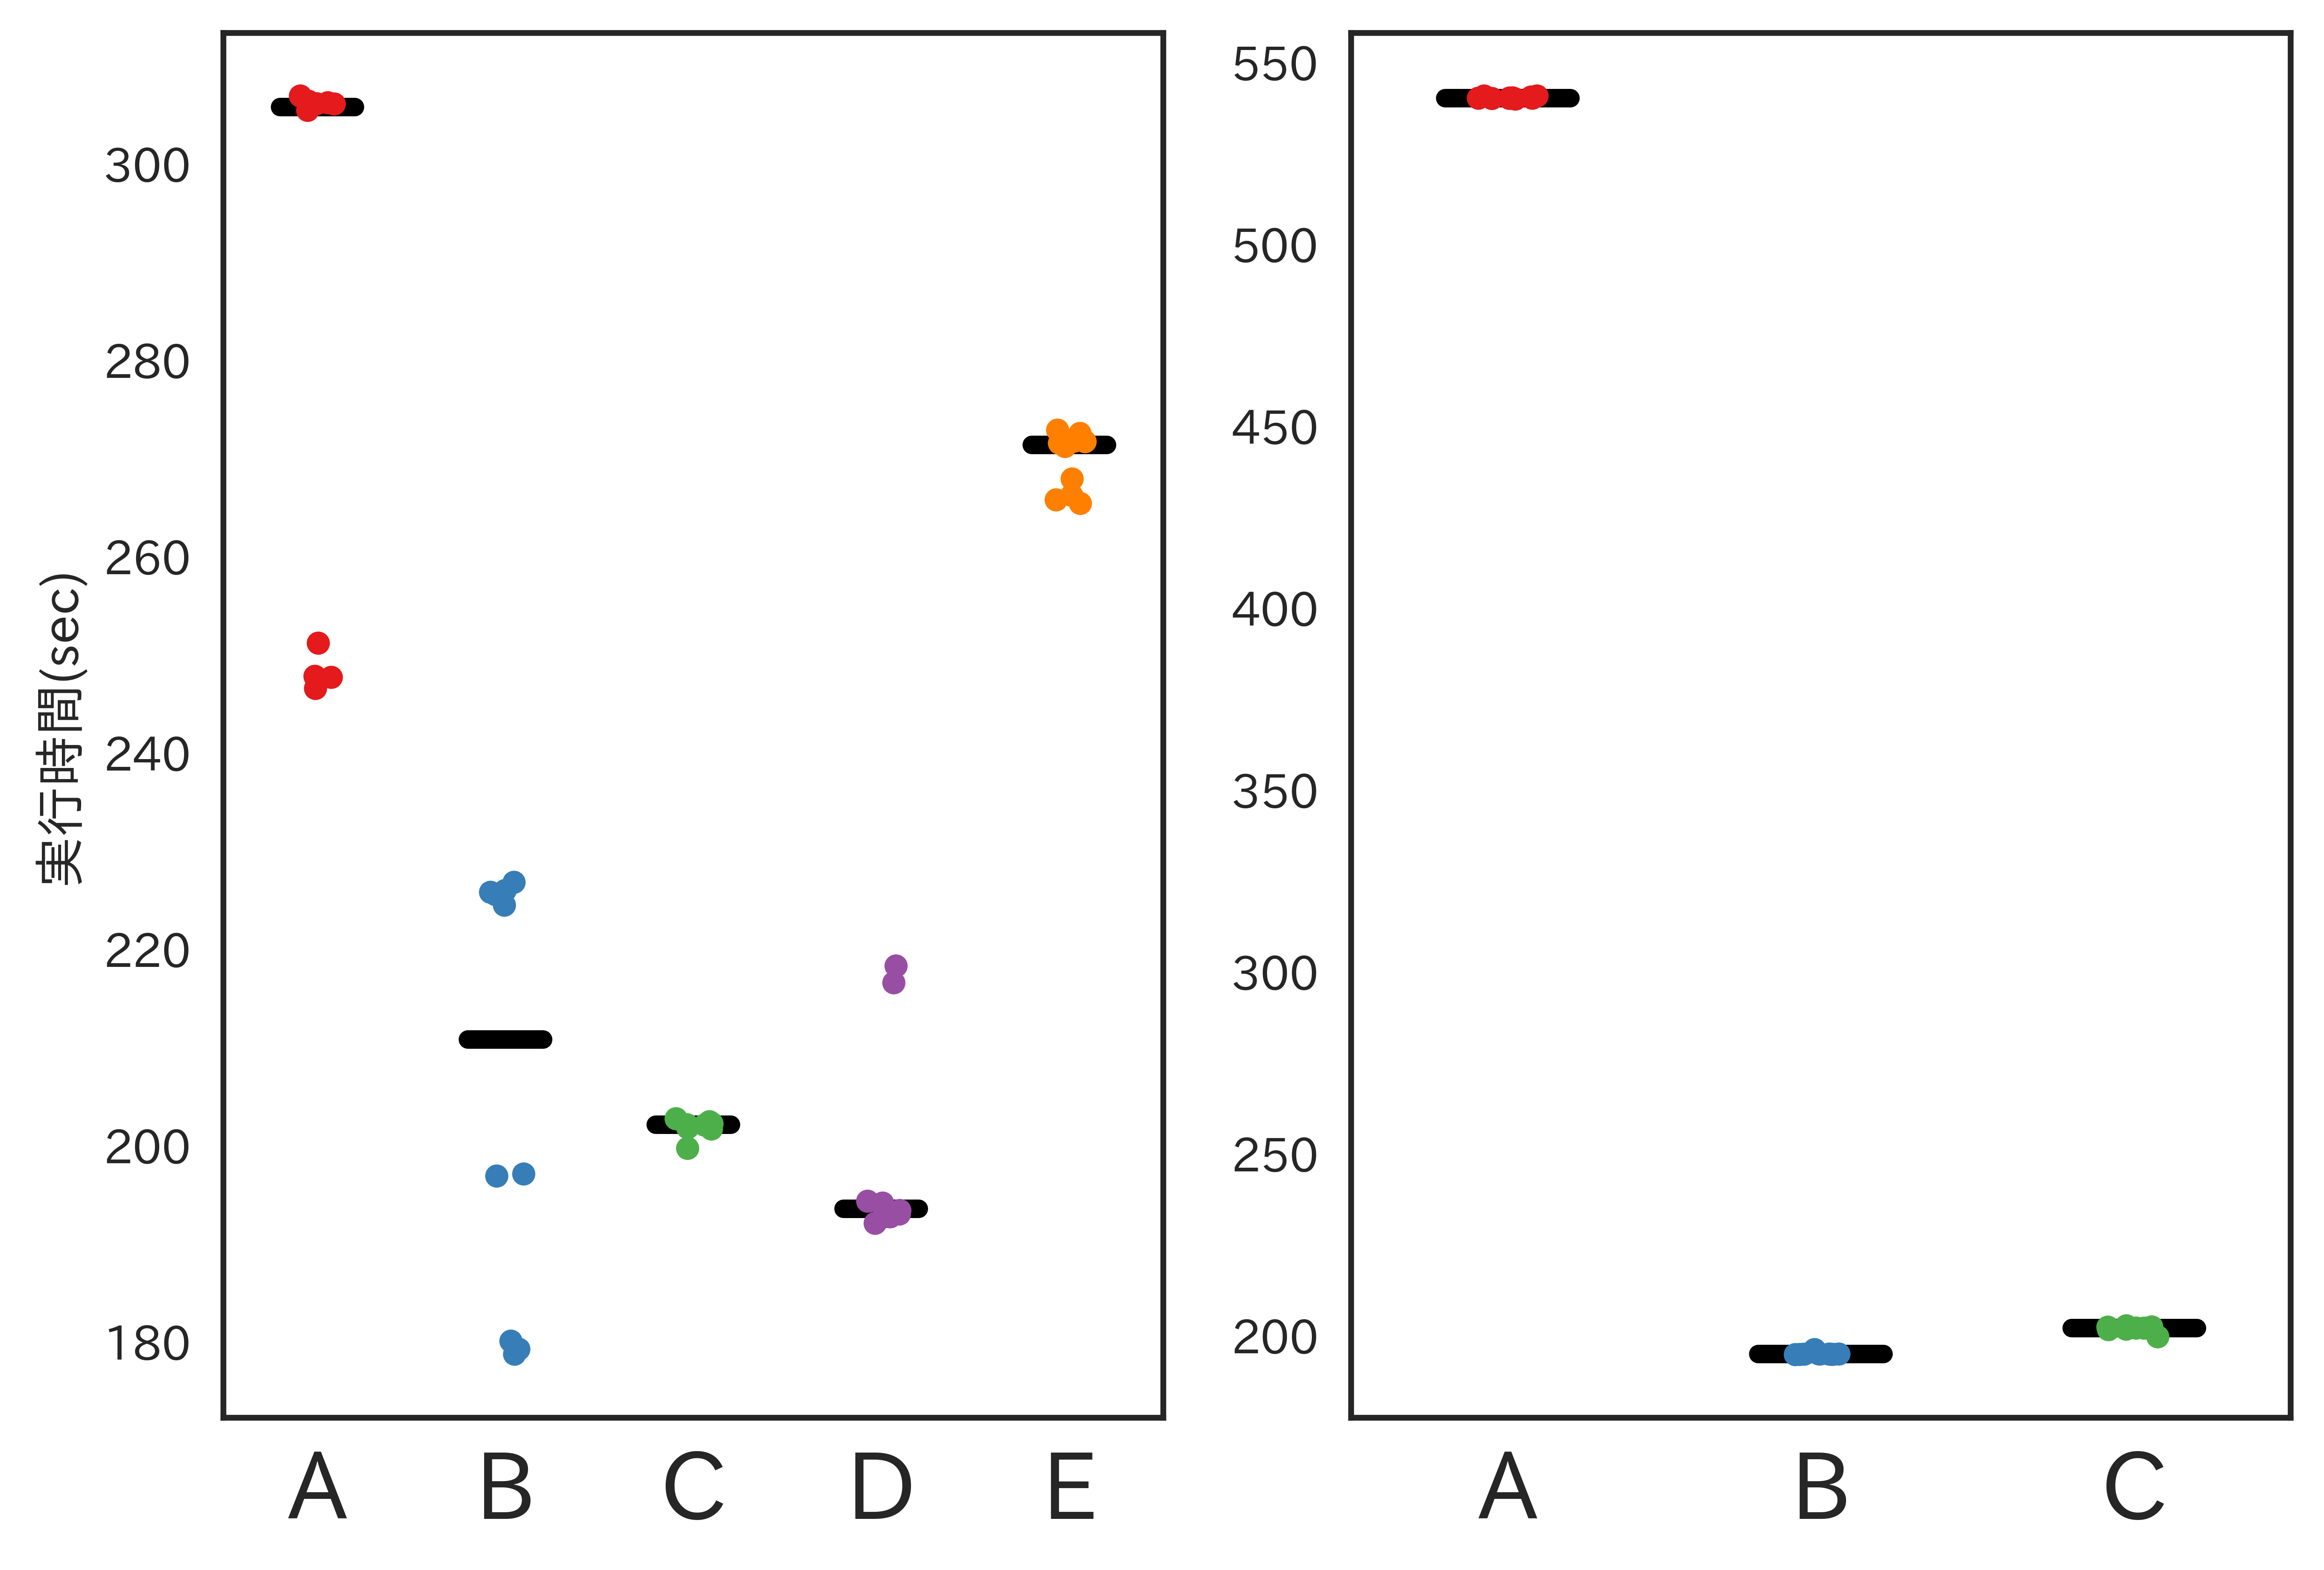

In [80]:
df_cluster = {
    "自動最適化": [220.992026, 192.518224, 194.101569, 220.950808, 220.335424, 225.530369, 192.859105, 225.757215, 220.190401, 193.026961],
    "マシンパラメータのみ最適化": [306.157610, 306.413272, 247.838257, 306.945893, 306.132023, 246.600985, 247.733106, 305.482598, 306.259903, 251.214914],
    "手動最適化": [226.011645, 226.855698, 178.792345, 179.301381, 225.616986, 225.840626, 197.147325, 180.120307, 224.526922, 196.936687],
    "icc": [266.276054, 267.938918, 265.444528, 265.809020, 271.246538, 271.793423, 271.584290, 272.576730, 271.736764, 272.912230],
    "デフォルト": [2769.389279, 5860.954495, 5841.403846, 5860.959548, 5850.891501, 5884.45570, 5882.077237, 5902.260200, 5899.499978, 5694.459678],
}
df_cluster = {
#     "デフォルト": [2769.389279, 5860.954495, 5841.403846, 5860.959548, 5850.891501, 5884.45570, 5882.077237, 5902.260200, 5899.499978, 5694.459678],
    "ハイブリッド並列": [306.157610, 306.413272, 247.838257, 306.945893, 306.132023, 246.600985, 247.733106, 305.482598, 306.259903, 251.214914],
    "手動最適化": [226.011645, 226.855698, 178.792345, 179.301381, 225.616986, 225.840626, 197.147325, 180.120307, 224.526922, 196.936687],
    "SIMD化": [202.158979 ,202.775673, 199.756990, 201.858775, 202.281723, 202.130959, 202.471293, 202.411957, 201.727052],
    "変数配置の最適化": [218.33339799999999, 194.37527900000001, 193.06609699999998, 193.74333899999999, 192.785934, 192.78697299999999,216.61959999999999,194.18272099999999,192.122319,193.427179],
    "ICC": [266.276054, 267.938918, 265.444528, 265.809020, 271.246538, 271.793423, 271.584290, 272.576730, 271.736764, 272.912230],
}
table = {
#     "デフォルト": "A",
    "ハイブリッド並列": "A",
    "手動最適化": "B",
    "SIMD化": "C",
    "変数配置の最適化": "D",
    "ICC": "E"
}

df_k = {
#     "デフォルト": [3843.444054, 3843.728815, 3843.399342, 3843.391069, 3843.662798, 3843.337617, 3843.606756, 3843.164386, 3842.924506],
    "ハイブリッド並列": [540.314667, 540.195012, 540.236031, 540.566031, 540.155487, 540.235561, 539.998205, 540.286428, 540.843942, 540.834667],
    "手動最適化": [194.901470, 196.241227, 194.939445, 195.043659, 195.016793, 195.008183, 194.926891, 194.858799, 194.967911, 195.023119],
    "SIMD化": [202.158979 ,202.775673, 199.756990, 201.858775, 202.281723, 202.130959, 202.471293, 202.411957, 201.727052],
}
scatter_med2(df_cluster, df_k, table, table, "compare-presen.png")

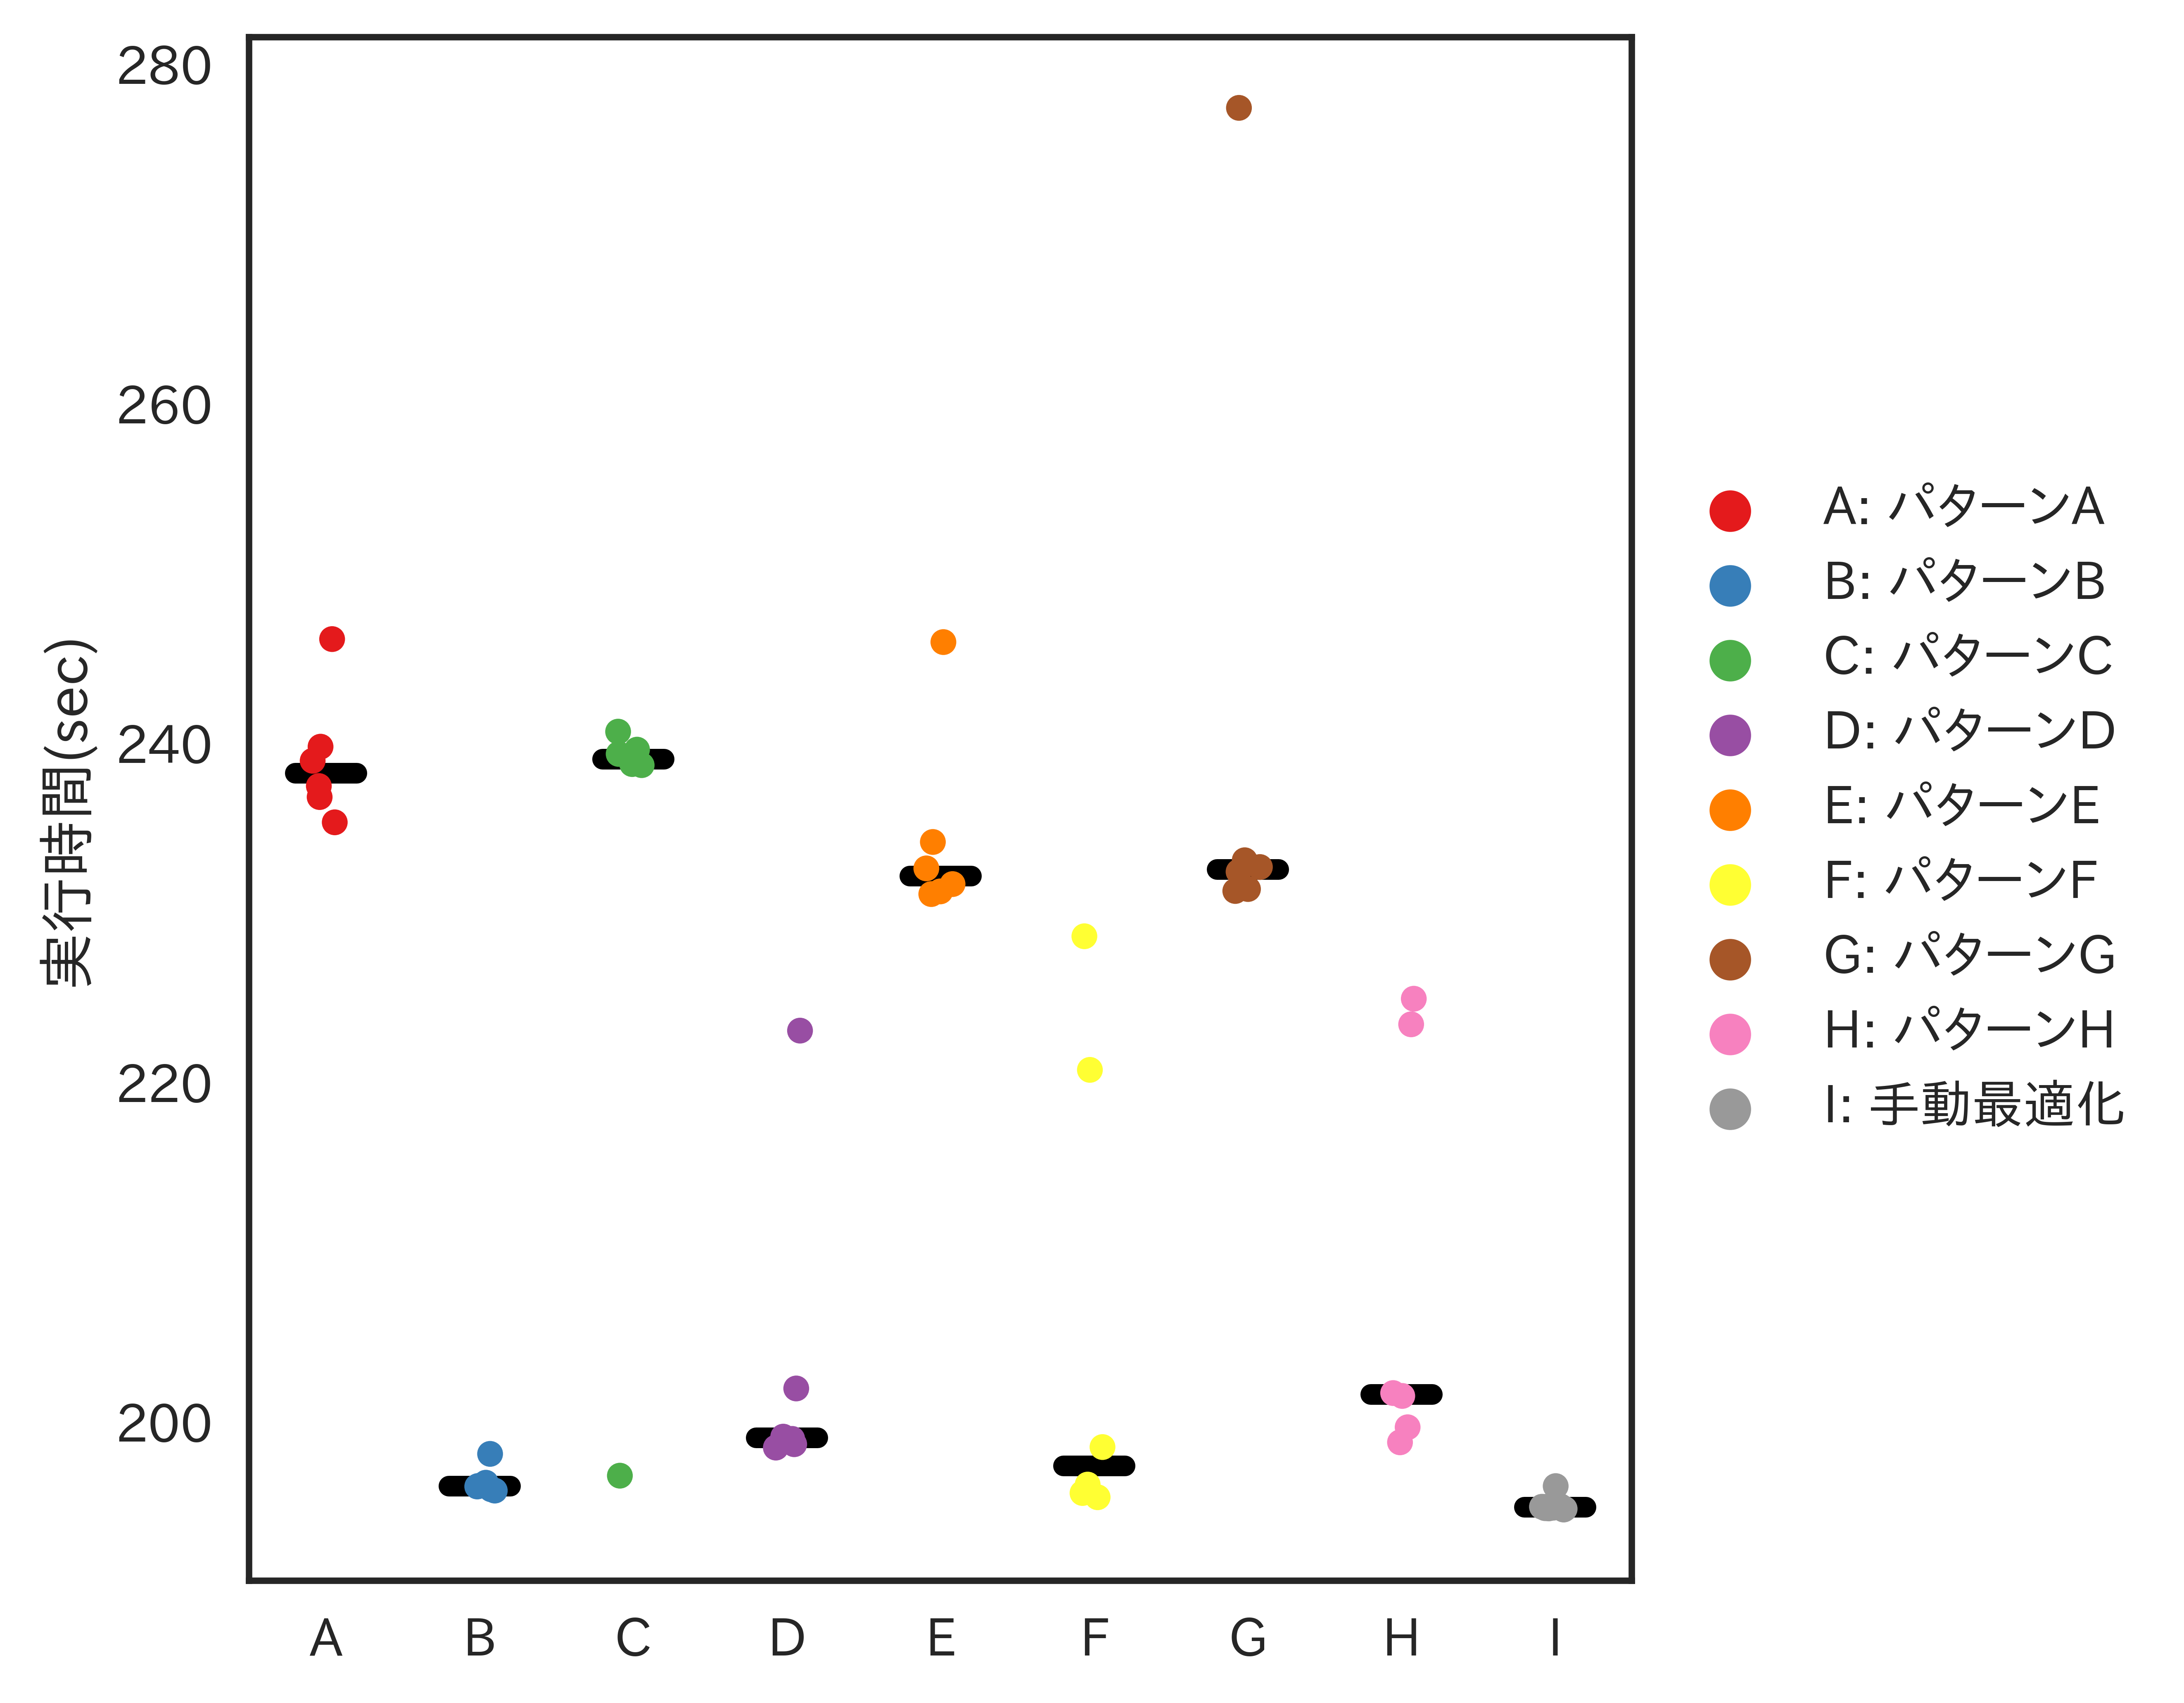

In [75]:
df = pd.read_csv("cluster/data/2018-02-04_21-14/result_candidate.csv")
# df['time_avg'] = (df['time'] + df['time0'] + df['time1'] + df['time2'] + df['time3'] + df['time4']) / 6.0
# df = df.sort_values(by=["time_avg"]).reset_index(drop=True)
# time = df['time_avg'].values
data = defaultdict()
label = defaultdict()
for i in range(len(df)):
    c = chr(ord('A') + i)
    data["パターン{0}".format(c)] = [df.loc[i]['time'], df.loc[i]['time0'], df.loc[i]['time1'], df.loc[i]['time2'], df.loc[i]['time3'], df.loc[i]['time4']]
    label["パターン{0}".format(c)] = c
data["手動最適化"] = [194.901470, 196.241227, 194.939445, 195.043659, 195.016793, 195.008183, 194.926891, 194.858799, 194.967911, 195.023119]
label["手動最適化"] = chr(ord('A') + i + 1)
scatter_med(data, label, "compare-merge-array.pdf")

In [77]:
df["macro"].values

array(['frozenset()',
       "frozenset({('m', 'h', 'ina', 'ena', 'gnabar', 'gna')})",
       "frozenset({('ek', 'n', 'ik', 'gk', 'gkbar')})",
       "frozenset({('m', 'h', 'ina', 'ena', 'gnabar', 'gna'), ('ek', 'n', 'ik', 'gk', 'gkbar')})",
       "frozenset({('v', 'el', 'il', 'gl')})",
       "frozenset({('m', 'h', 'ina', 'ena', 'gnabar', 'gna'), ('v', 'el', 'il', 'gl')})",
       "frozenset({('ek', 'n', 'ik', 'gk', 'gkbar'), ('v', 'el', 'il', 'gl')})",
       "frozenset({('m', 'h', 'ina', 'ena', 'gnabar', 'gna'), ('ek', 'n', 'ik', 'gk', 'gkbar'), ('v', 'el', 'il', 'gl')})"], dtype=object)

In [21]:
df = pd.read_csv("cluster/data/2018-02-06_22-54/result_candidate.csv")
# df['time_avg'] = (df['time'] + df['time0'] + df['time1'] + df['time2'] + df['time3'] + df['time4']) / 6.0
# df = df.sort_values(by=["time_avg"]).reset_index(drop=True)
# time = df['time_avg'].values
d = df.loc[1]
[d["time"],d["time0"],d["time1"],d["time2"],d["time3"],d["time4"],d["time5"],d["time6"],d["time7"],d["time8"]]

[218.33339799999999,
 194.37527900000001,
 193.06609699999998,
 193.74333899999999,
 192.785934,
 192.78697299999999,
 216.61959999999999,
 194.18272099999999,
 192.122319,
 193.427179]

In [67]:
d = {
    50: [11.299595, 11.384495, 11.384828, 11.196541, 11.132742, 11.287394, 11.424634, 11.242091, 11.14946, 11.119926],
    100: [22.149985, 21.891709, 21.988801, 21.914453, 21.884141, 22.318382, 21.924565, 22.01469, 21.788477, 21.735335],
    250: [57.835312, 57.568706, 57.780264, 57.423612, 57.19678, 57.969445, 57.537237, 57.50758, 57.556384, 49.106541],
    500: [115.949907, 118.858261, 116.484394, 117.071736, 120.179801, 116.437594, 116.655048, 116.247668, 115.89942, 116.949024],
    1000: [218.33339799999999, 194.37527900000001, 193.06609699999998, 193.74333899999999, 192.785934, 192.78697299999999,216.61959999999999,194.18272099999999,192.122319,193.427179]
}
label = []
data = []
for k in d:
    for v in d[k]:
        label.append(k)
        data.append(v)
df = pd.DataFrame({"シミュレーション時間（ms）": label, "実行時間(sec)": data})

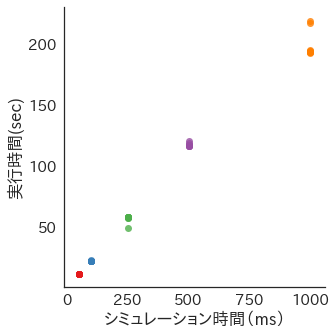

In [69]:
sns.set(font='IPAPGothic', style="white", font_scale=1.5)
p = sns.lmplot(x="シミュレーション時間（ms）", y="実行時間(sec)", hue="シミュレーション時間（ms）", palette="Set1", data=df, fit_reg=False, legend=False)
p.savefig(join("/Users/hashmup/Dropbox/研究室/卒業論文/thesis/images", "time-scale.png"))

In [70]:
import seaborn as sns
# sns.set_style(style="white")
sns.set(font='IPAPGothic', style="white")
def scatter_med2(data1, data2, filename):
    label1 = []
    label2 = []
    xtick1 = []
    xtick2 = []
    value1 = []
    value2 = []
    for k in data1:
        for v in data1[k]:
            value1.append(v)
            label1.append(k)
        xtick1.append(table1[k])
    for k in data2:
        for v in data2[k]:
            value2.append(v)
            label2.append(k)
        xtick2.append(table2[k])
    df1 = pd.DataFrame({
        "シミュレーション時間": label1,
        "実行時間(sec)": value1
    })
    df2 = pd.DataFrame({
        "シミュレーション時間": label2,
        "実行時間(sec)": value2
    })
    median_width = 0.4

    fig, axes = plt.subplots(nrows=1, ncols=2, dpi=900)
    sns.lmplot(x="シミュレーション時間", y="実行時間(sec)",  hue="シミュレーション時間", palette="Set1", data=df1, ax=axes[0], fit_reg=False)
    sns.lmplot(x="シミュレーション時間", y="実行時間(sec)",  hue="シミュレーション時間", palette="Set1", data=df2, ax=axes[1], fit_reg=False)
    for tick, text in zip(axes[0].get_xticks(), axes[0].get_xticklabels()):
        sample_name = text.get_text()  # "X" or "Y"

        # calculate the median value for all replicates of either X or Y
        median_val = df1[df1['category']==sample_name]['実行時間(sec)'].median()

        # plot horizontal lines across the column, centered on the tick
        axes[0].plot([tick-median_width/2, tick+median_width/2], [median_val, median_val],
                lw=4, color='k')
    for tick, text in zip(axes[1].get_xticks(), axes[1].get_xticklabels()):
        sample_name = text.get_text()  # "X" or "Y"

        # calculate the median value for all replicates of either X or Y
        median_val = df2[df2['category']==sample_name]['実行時間(sec)'].median()

        # plot horizontal lines across the column, centered on the tick
        axes[1].plot([tick-median_width/2, tick+median_width/2], [median_val, median_val],
                lw=4, color='k')
    axes[0].set_xlabel('')
    axes[1].set_xlabel('')
    axes[1].set_ylabel('')
#     axes[0].set_title('クラスタ')
#     axes[1].set_title('京')
    axes[0].set_xticklabels(xtick1, fontsize=20)
    axes[1].set_xticklabels(xtick2, fontsize=20)
    h1, l1 = axes[0].get_legend_handles_labels()
    h2, l2 = axes[1].get_legend_handles_labels()
    axes[0].legend_.remove()
    axes[1].legend_.remove()
#     fig.legend(h1+h2, l1, loc="center right", bbox_to_anchor=(1, 0.5), fontsize=10, frameon=True)
#     fig.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
#     fig.subplots_adjust(right=0.85)
    fig.savefig(join("/Users/hashmup/Dropbox/研究室/卒業論文/thesis/images", filename))
    plt.show()

In [34]:
d1 = {
    50: [11.299595, 11.384495, 11.384828, 11.196541, 11.132742, 11.287394, 11.424634, 11.242091, 11.14946, 11.119926],
    100: [22.149985, 21.891709, 21.988801, 21.914453, 21.884141, 22.318382, 21.924565, 22.01469, 21.788477, 21.735335],
    250: [57.835312, 57.568706, 57.780264, 57.423612, 57.19678, 57.969445, 57.537237, 57.50758, 57.556384, 49.106541],
    500: [115.949907, 118.858261, 116.484394, 117.071736, 120.179801, 116.437594, 116.655048, 116.247668, 115.89942, 116.949024],
    1000: [218.33339799999999, 194.37527900000001, 193.06609699999998, 193.74333899999999, 192.785934, 192.78697299999999,216.61959999999999,194.18272099999999,192.122319,193.427179]
}

d2 = {
    
}

[11.299595,
 11.384495,
 11.384828,
 11.196541,
 11.132742,
 11.287394,
 11.424634,
 11.242091,
 11.14946,
 11.119926]